In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Increasing the dpi makes the plot clearer
plt.rcParams['figure.dpi'] = 300

In [41]:
batting = pd.read_parquet("data/batting_cleaned.parquet.gz")
pitching = pd.read_parquet("data/pitching_cleaned.parquet.gz")

In [42]:
batting.head()

,IDfg,Season,Team,Age,weight,OPS,WAR,OBP+,2B,3B,HR,SO,CS:SB
0,1008559,1998,STL,34,509,0.002401,8.5,138.0,0.041257,0.000000,0.137525,0.304519,0.000000
1,1109,1998,SFG,33,552,0.001897,8.5,129.0,0.079710,0.012681,0.067029,0.166667,0.428571
2,1093,1998,NYM,29,557,0.001792,8.1,132.0,0.064632,0.007181,0.039497,0.131059,1.000000
3,1274,1998,SEA,22,686,0.001340,7.9,106.0,0.051020,0.007289,0.061224,0.176385,0.282609
4,190,1998,BOS,24,604,0.001566,7.3,106.0,0.061258,0.013245,0.057947,0.102649,0.500000


In [43]:
pitching.head()

,IDfg,Season,Team,Age,weight,ERA-,H,HR,BB,SO
0,642,1998,SDP,33,1032,60,0.218023,0.007752,0.047481,0.249031
1,73,1998,PHI,31,1089,76,0.216713,0.021120,0.056015,0.275482
2,815,1998,TOR,35,961,57,0.175858,0.011446,0.091571,0.281998
4,104,1998,ATL,32,987,53,0.203647,0.013171,0.045593,0.206687
5,200,1998,BOS,26,951,61,0.197687,0.027340,0.070452,0.263933


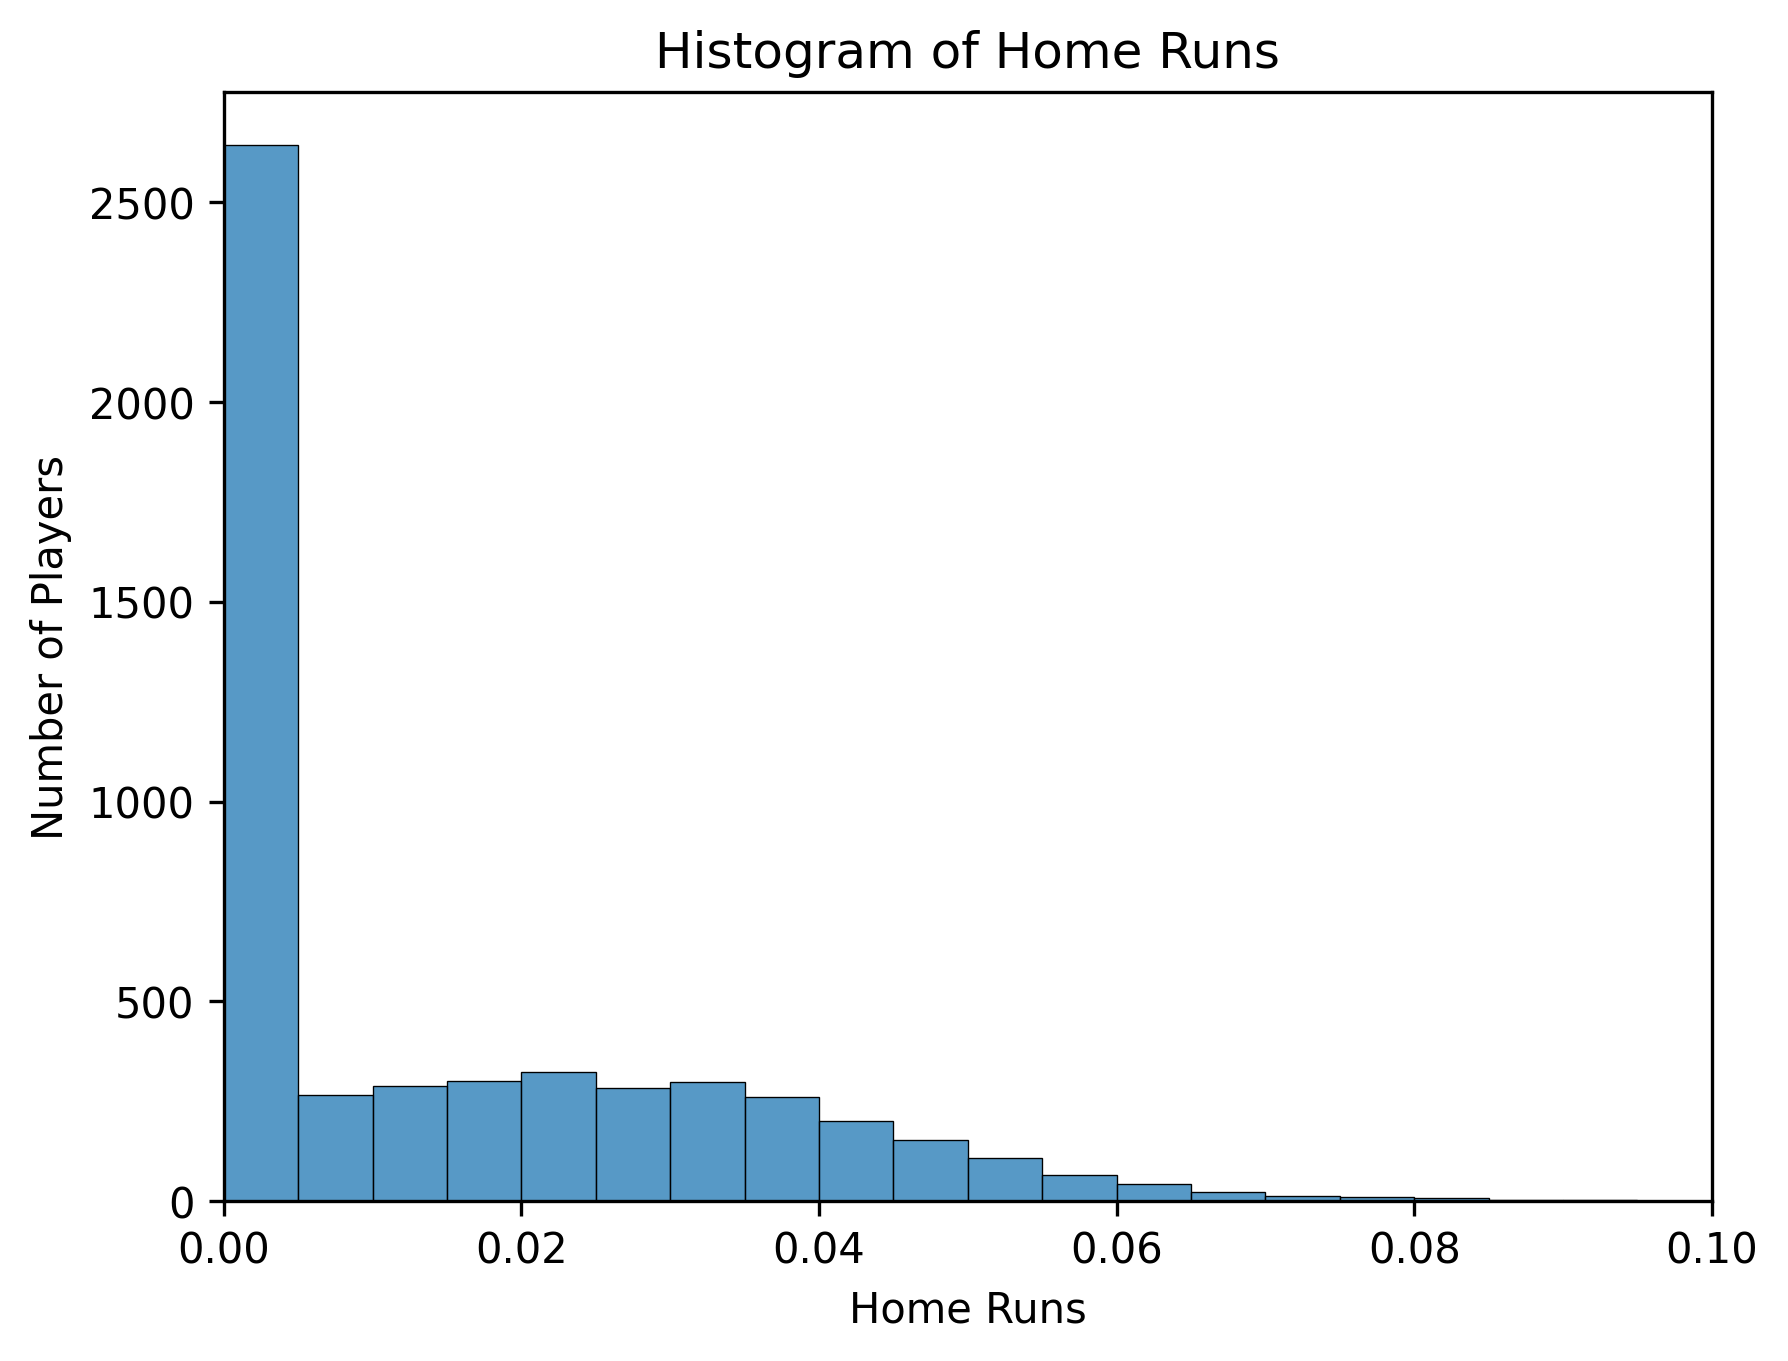

In [44]:
# Getting the ID for each of the batters
batter_ids = batting['IDfg'].unique()

# Using the numpy weighted average function to calculate the average home runs per player
batting_hr = []
for batter_id in batter_ids:
    batter = batting[batting['IDfg'] == batter_id]
    hr = np.average(batter['HR'], weights=batter['weight'])
    batting_hr.append([batter_id, hr])

batter_hr = pd.DataFrame(batting_hr, columns=['batter_id', 'HR'])

# Plottin the histogram of the home runs
sns.histplot(batter_hr['HR'], bins=100)
plt.xlabel('Home Runs')
plt.ylabel('Number of Players')
plt.title('Histogram of Home Runs')
plt.xlim(0, 0.1)
plt.show()

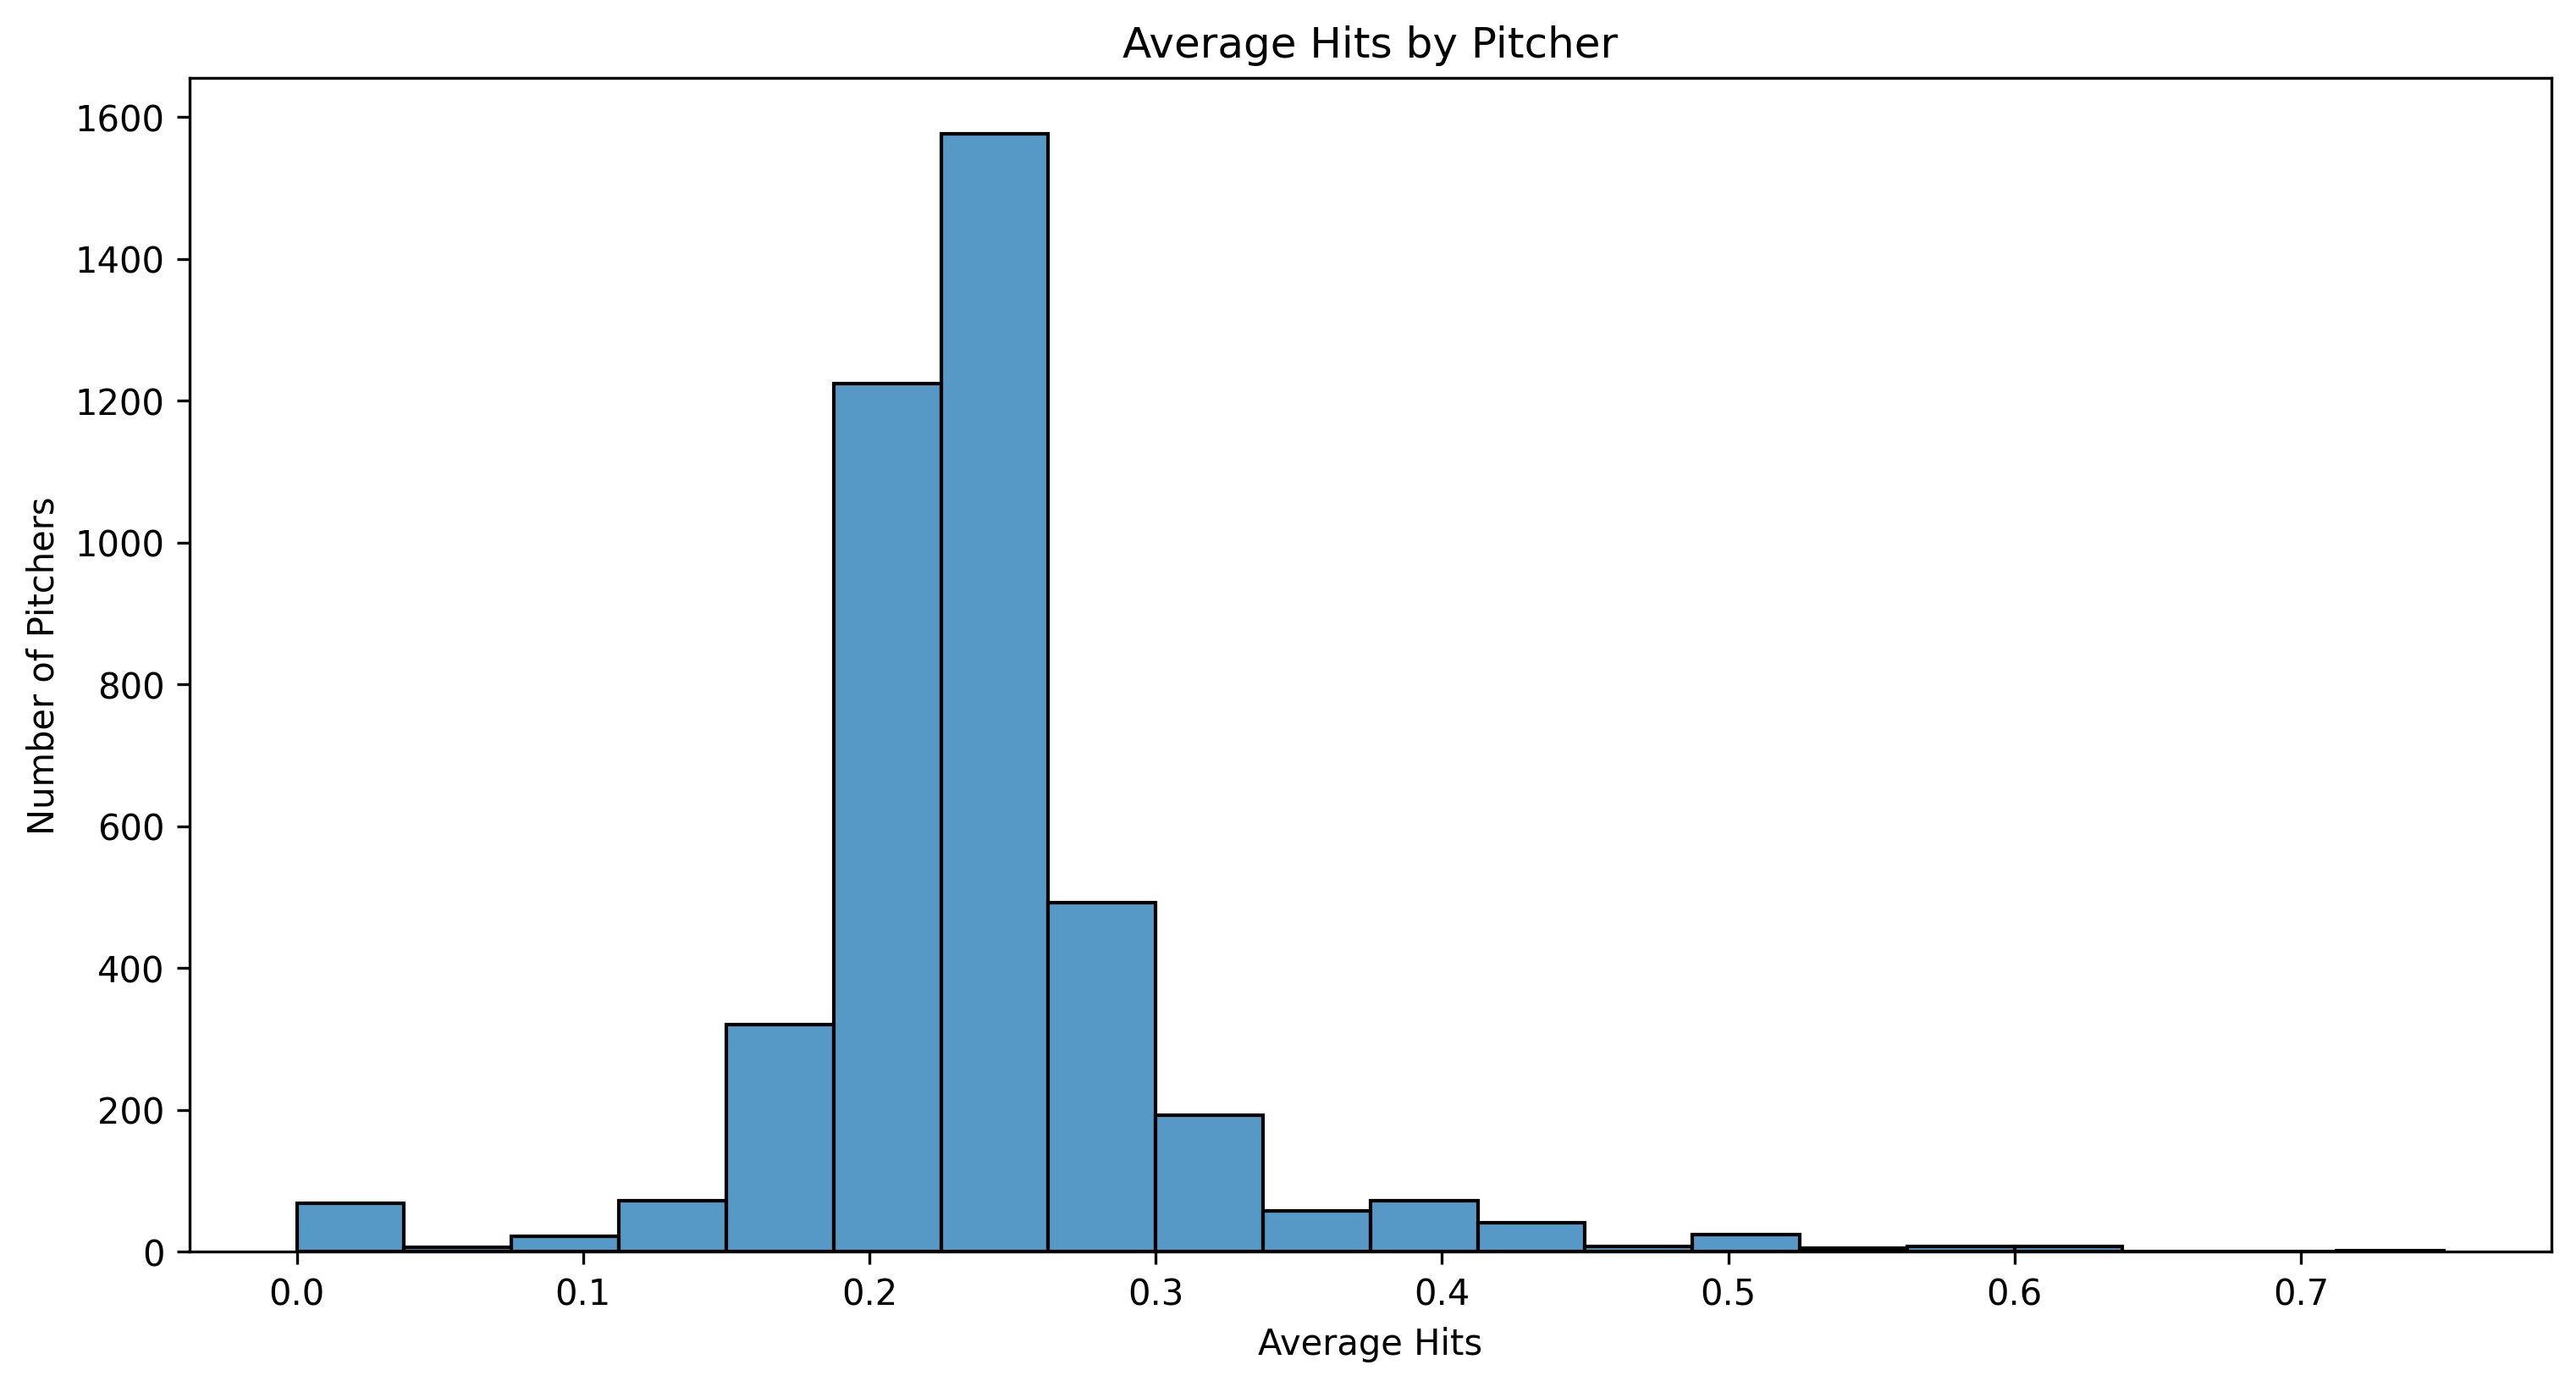

In [45]:
# Getting the values IDs for the pitchers
pitcher_ids = pitching["IDfg"].unique()

# Using numpy weighted average to average the hits by pitcher and then creating a new dataframe
pitcher_hits = []
for pitcher in pitcher_ids:
    pitcher_data = pitching[pitching["IDfg"] == pitcher]
    pitcher_hits.append(np.average(pitcher_data["H"], weights=pitcher_data["weight"]))

pitcher_hits_df = pd.DataFrame({"IDfg": pitcher_ids, "H": pitcher_hits})

# Plotting a histogram of the average hits by pitcher
plt.figure(figsize=(12, 6))
sns.histplot(pitcher_hits_df["H"], bins=20)
plt.title("Average Hits by Pitcher")
plt.xlabel("Average Hits")
plt.ylabel("Number of Pitchers")
plt.show()


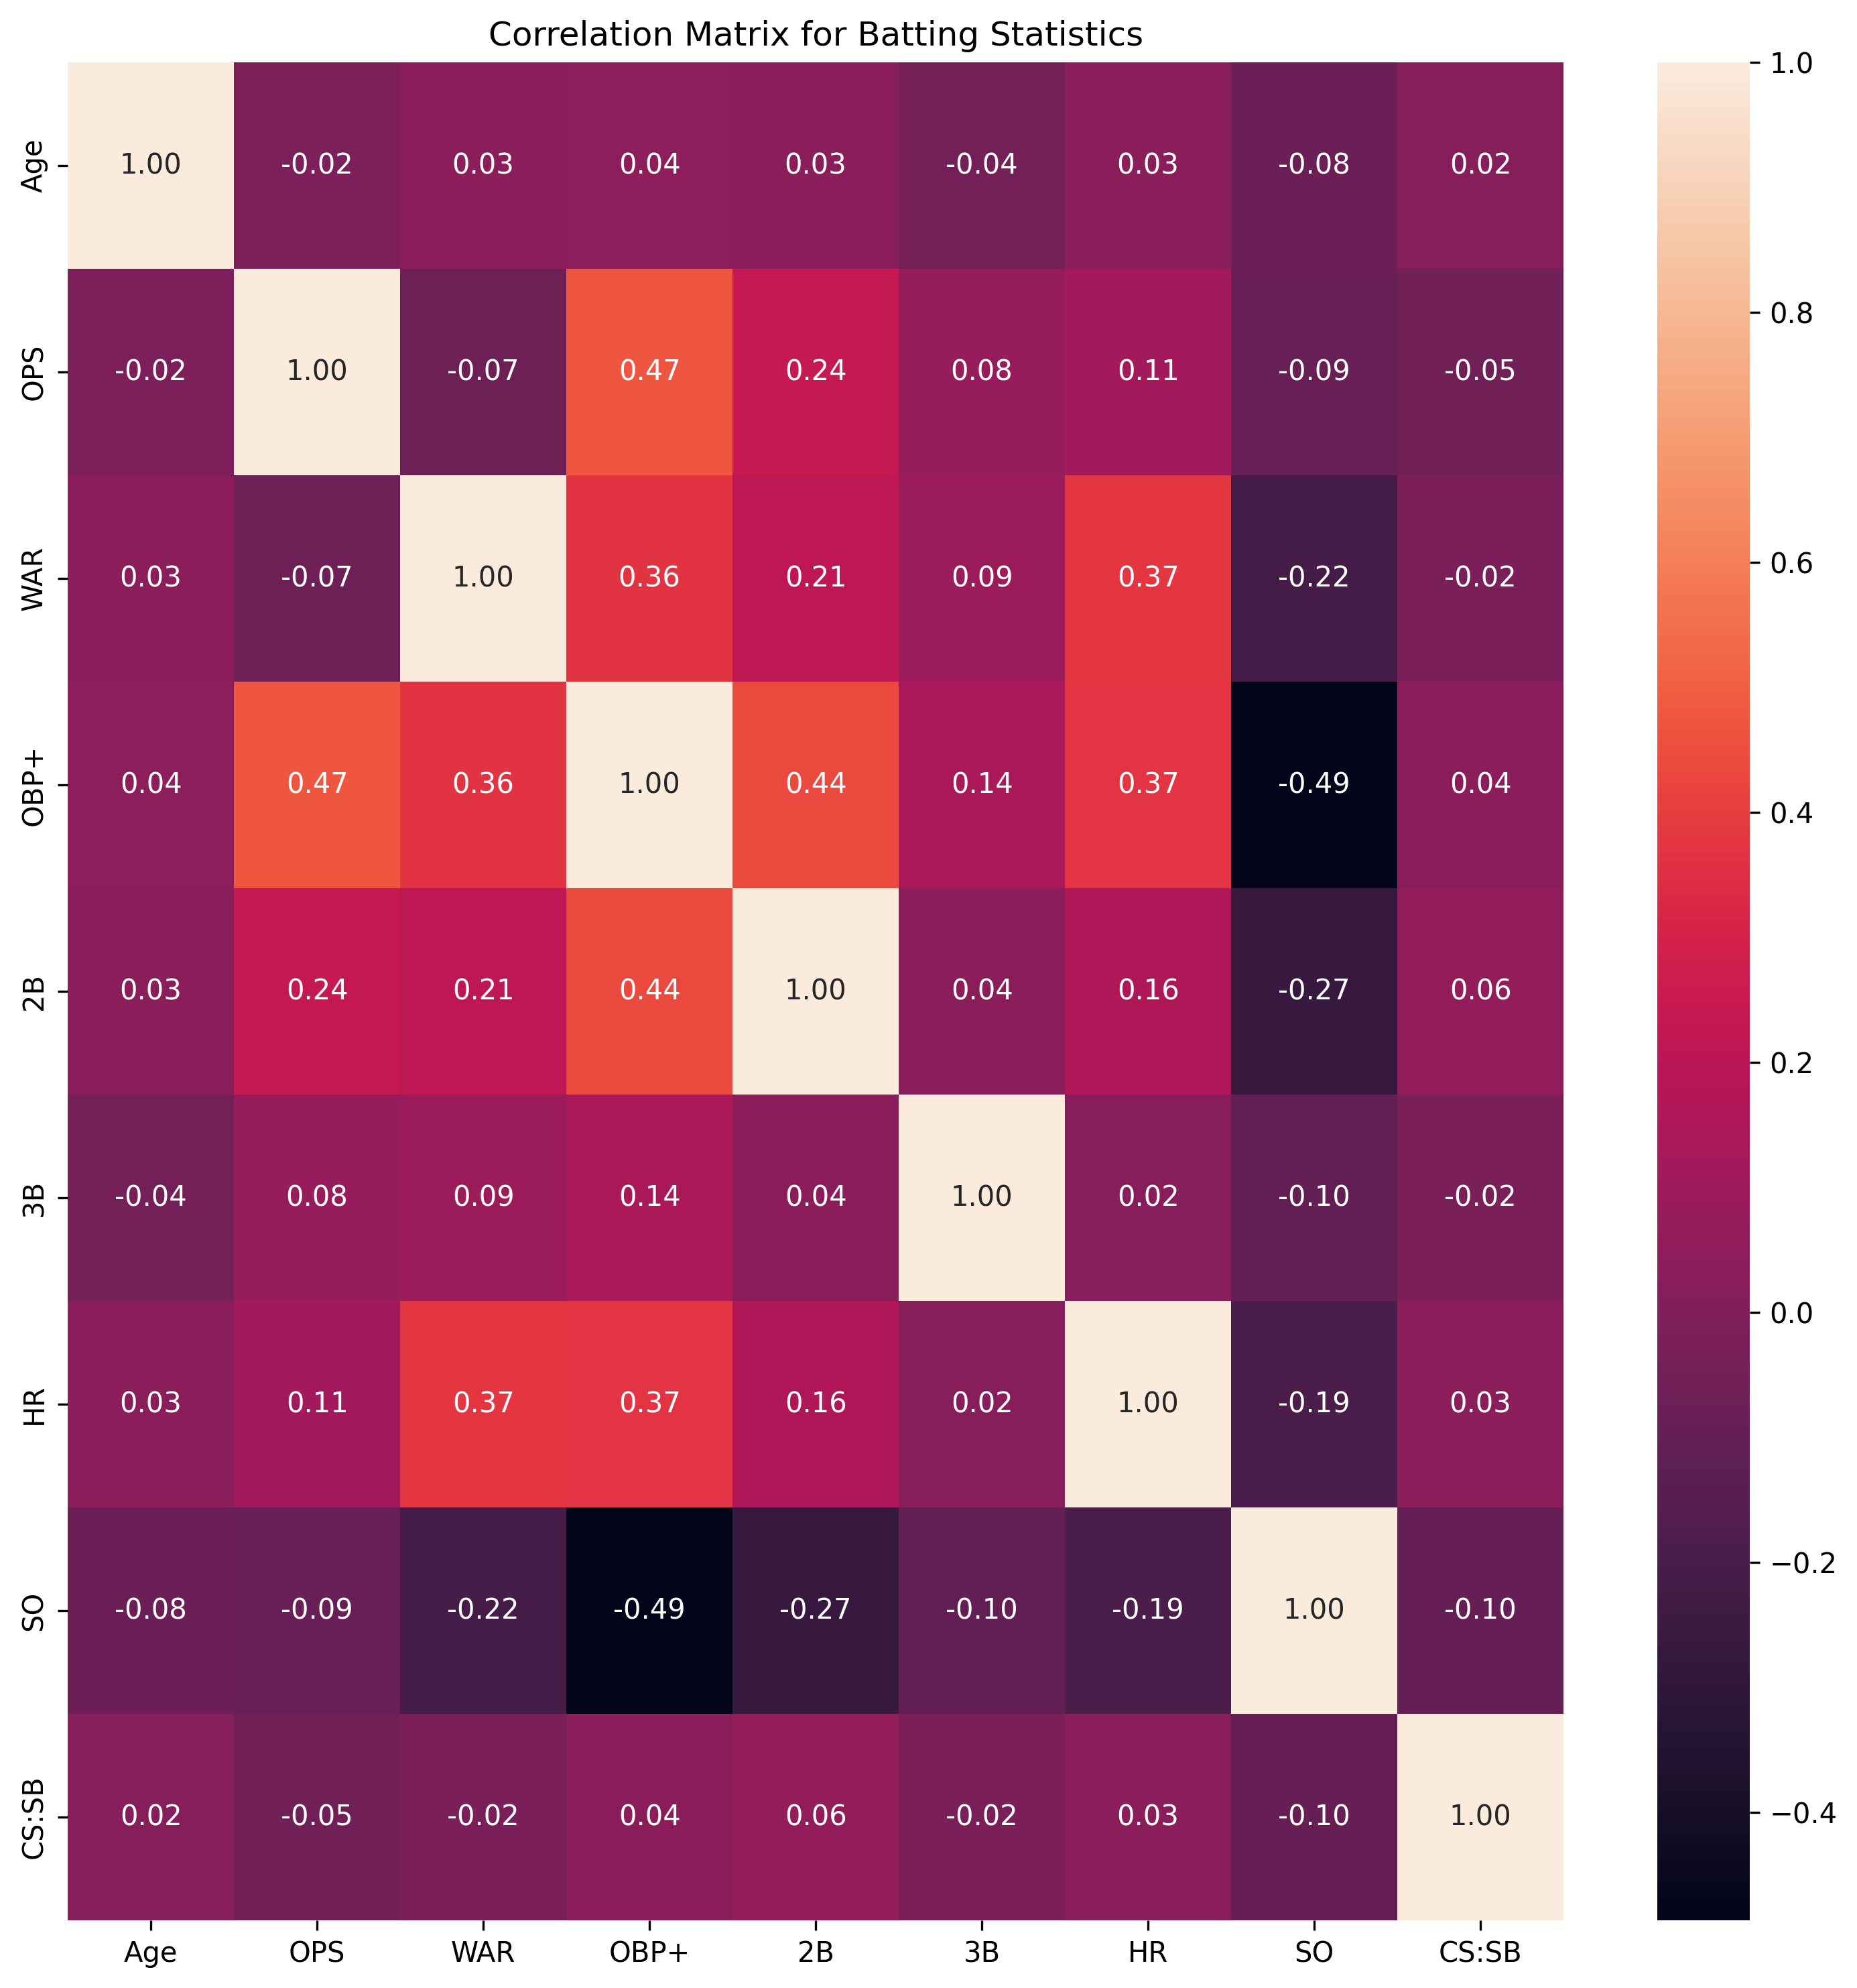

In [46]:
# Creating a correlation matrix for all of the batting statistics and pitching statistics
# Dropping the playerID, Team, and Season columns
batting = batting.drop(columns=["IDfg", "Team", "Season", "weight"])
pitching = pitching.drop(columns=["IDfg", "Team", "Season", "weight"])


batting_corr = batting.corr()
pitching_corr = pitching.corr()

# Plotting the correlation matrix for batting statistics
plt.figure(figsize=(12, 12))
sns.heatmap(batting_corr, annot=True, fmt=".2f")
plt.title("Correlation Matrix for Batting Statistics")
plt.show()

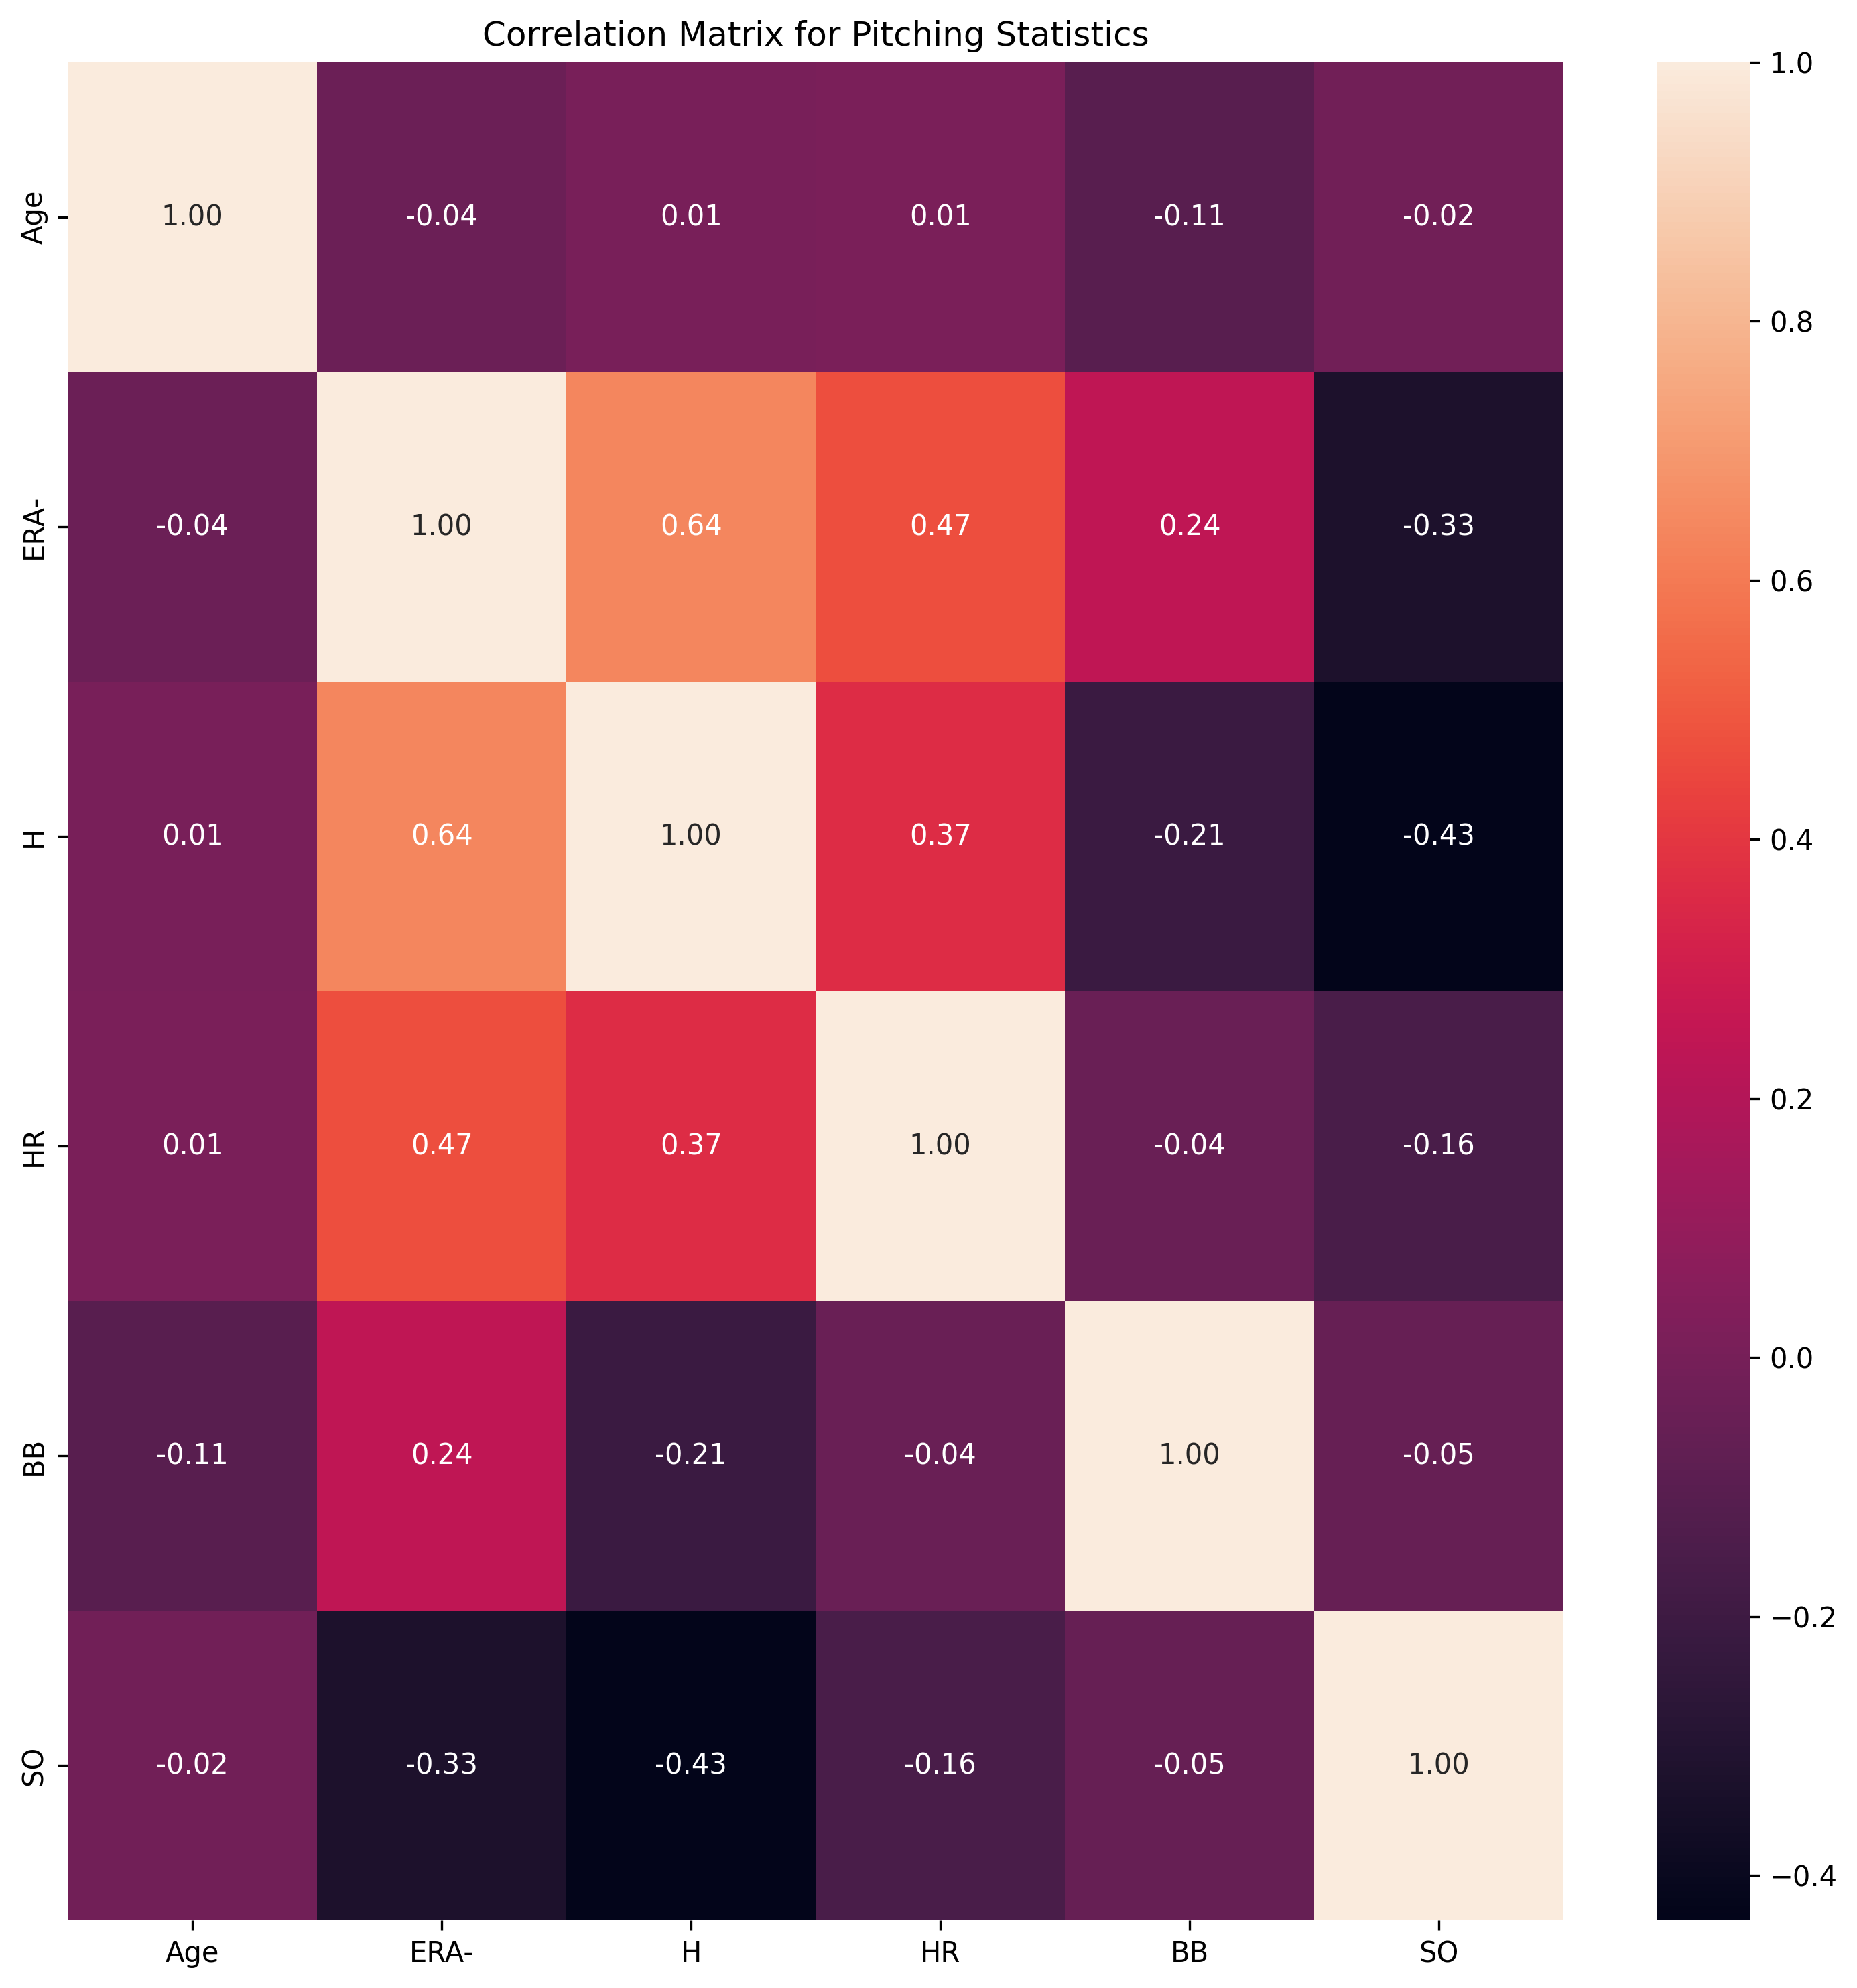

In [47]:
# Creating a correlation matrix for pitching statistics
plt.figure(figsize=(12, 12))
sns.heatmap(pitching_corr, annot=True, fmt=".2f")
plt.title("Correlation Matrix for Pitching Statistics")
plt.show()